In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('car data.csv')

## Data Preprocessing

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Hero Passion X pro           1
vitara brezza                1
UM Renegade Mojave           1
800                          1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [11]:
df.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2003     2
2007     2
2004     1
2018     1
Name: Year, dtype: int64

## Handeling Categorical Value

In [12]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [13]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [14]:
df.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
df.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
df.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)

In [15]:
df[["Fuel_Type","Seller_Type","Transmission"]]=df[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

In [16]:
df.Fuel_Type.unique()

array([0, 1, 2])

In [17]:
df.Seller_Type.unique()

array([0, 1])

In [18]:
df.Transmission.unique()

array([0, 1])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int32  
 6   Seller_Type    301 non-null    int32  
 7   Transmission   301 non-null    int32  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 17.8+ KB


## Exploratory Data Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int32  
 6   Seller_Type    301 non-null    int32  
 7   Transmission   301 non-null    int32  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 17.8+ KB


In [21]:
df1 = df.drop(columns=['Car_Name'],axis=1)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int32  
 5   Seller_Type    301 non-null    int32  
 6   Transmission   301 non-null    int32  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 15.4 KB


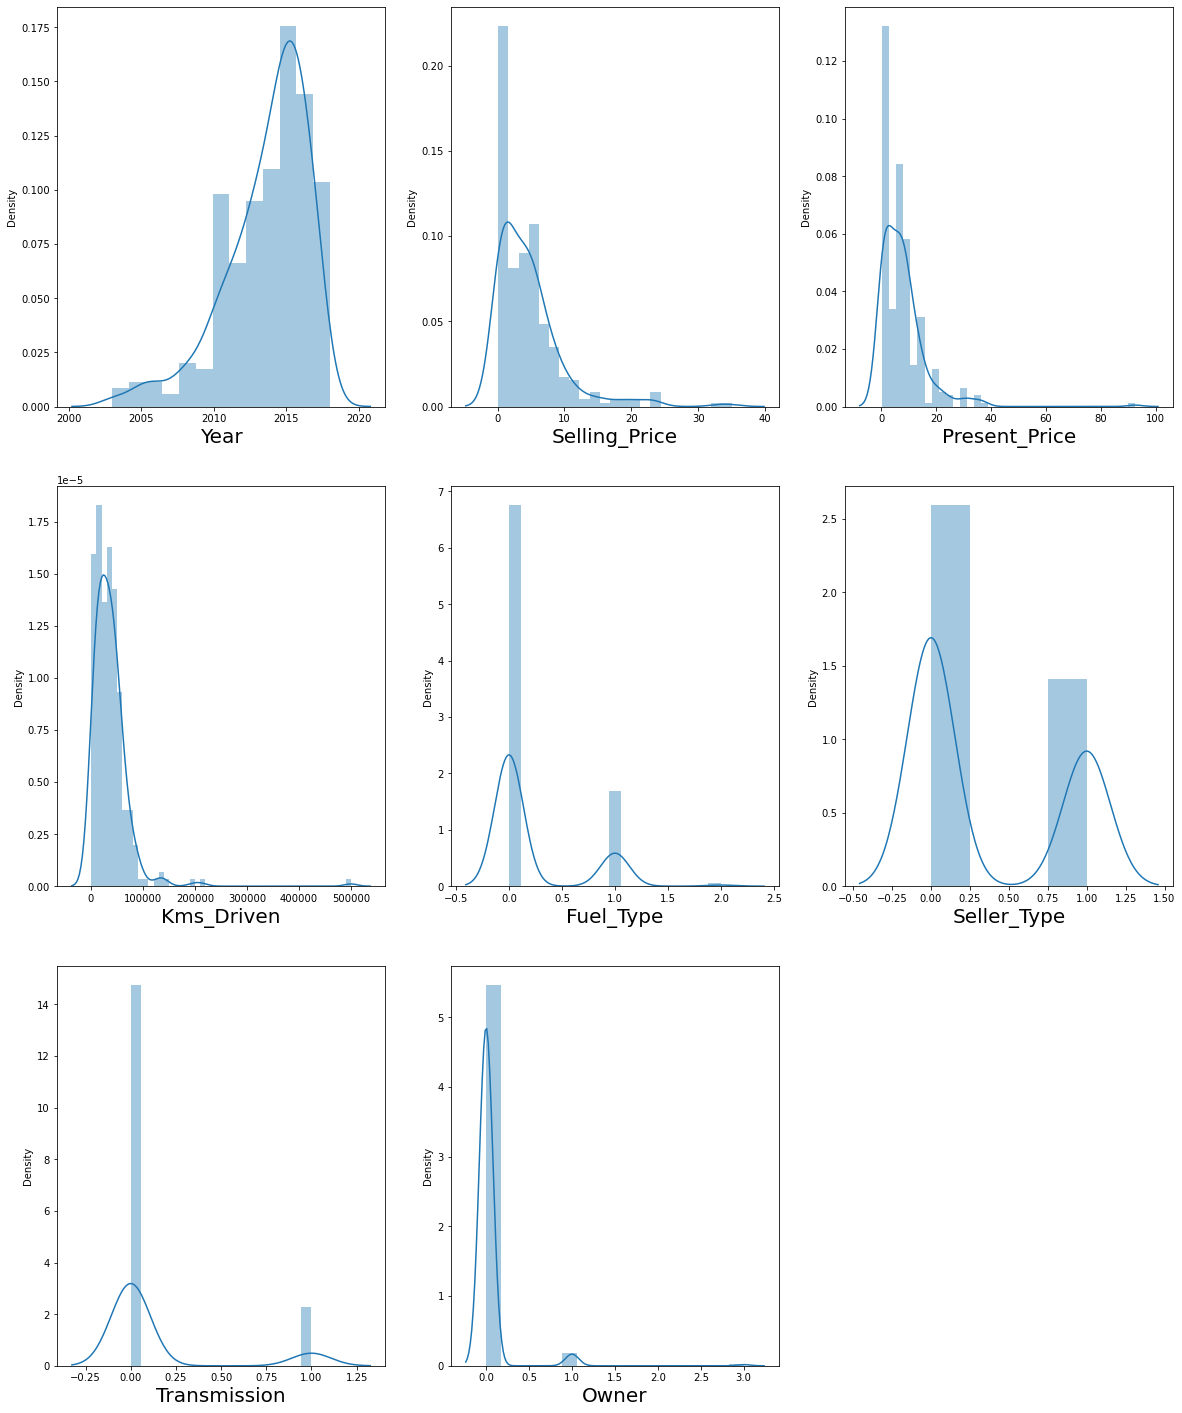

In [23]:
#visulaziation
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df1:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

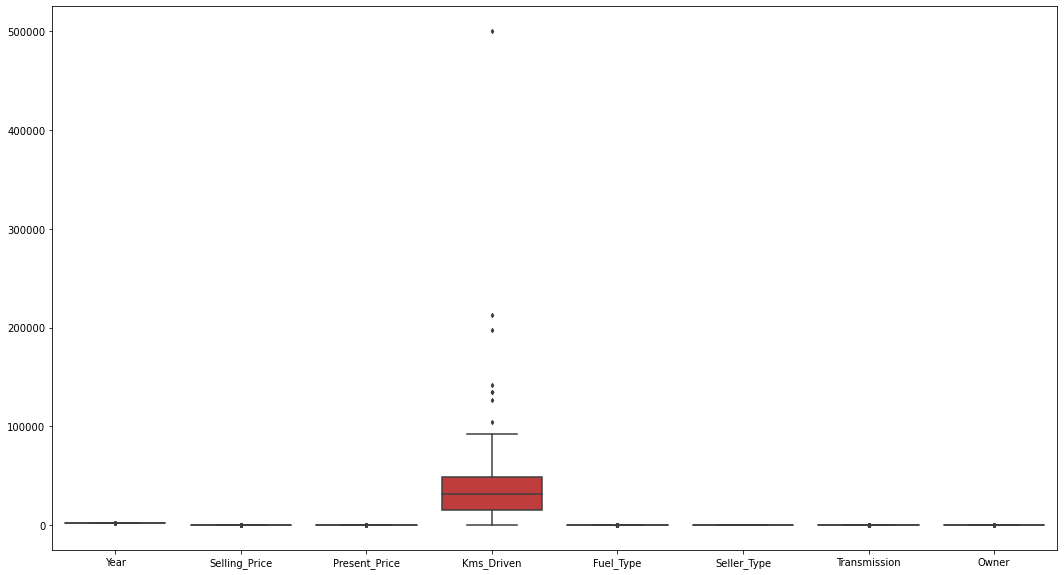

In [24]:
fig,ax=plt.subplots(figsize=(18,10))
sns.boxplot(data=df1,ax=ax,fliersize=3)

In [25]:
x = df1.drop(columns=['Selling_Price'])
y = df1['Selling_Price']

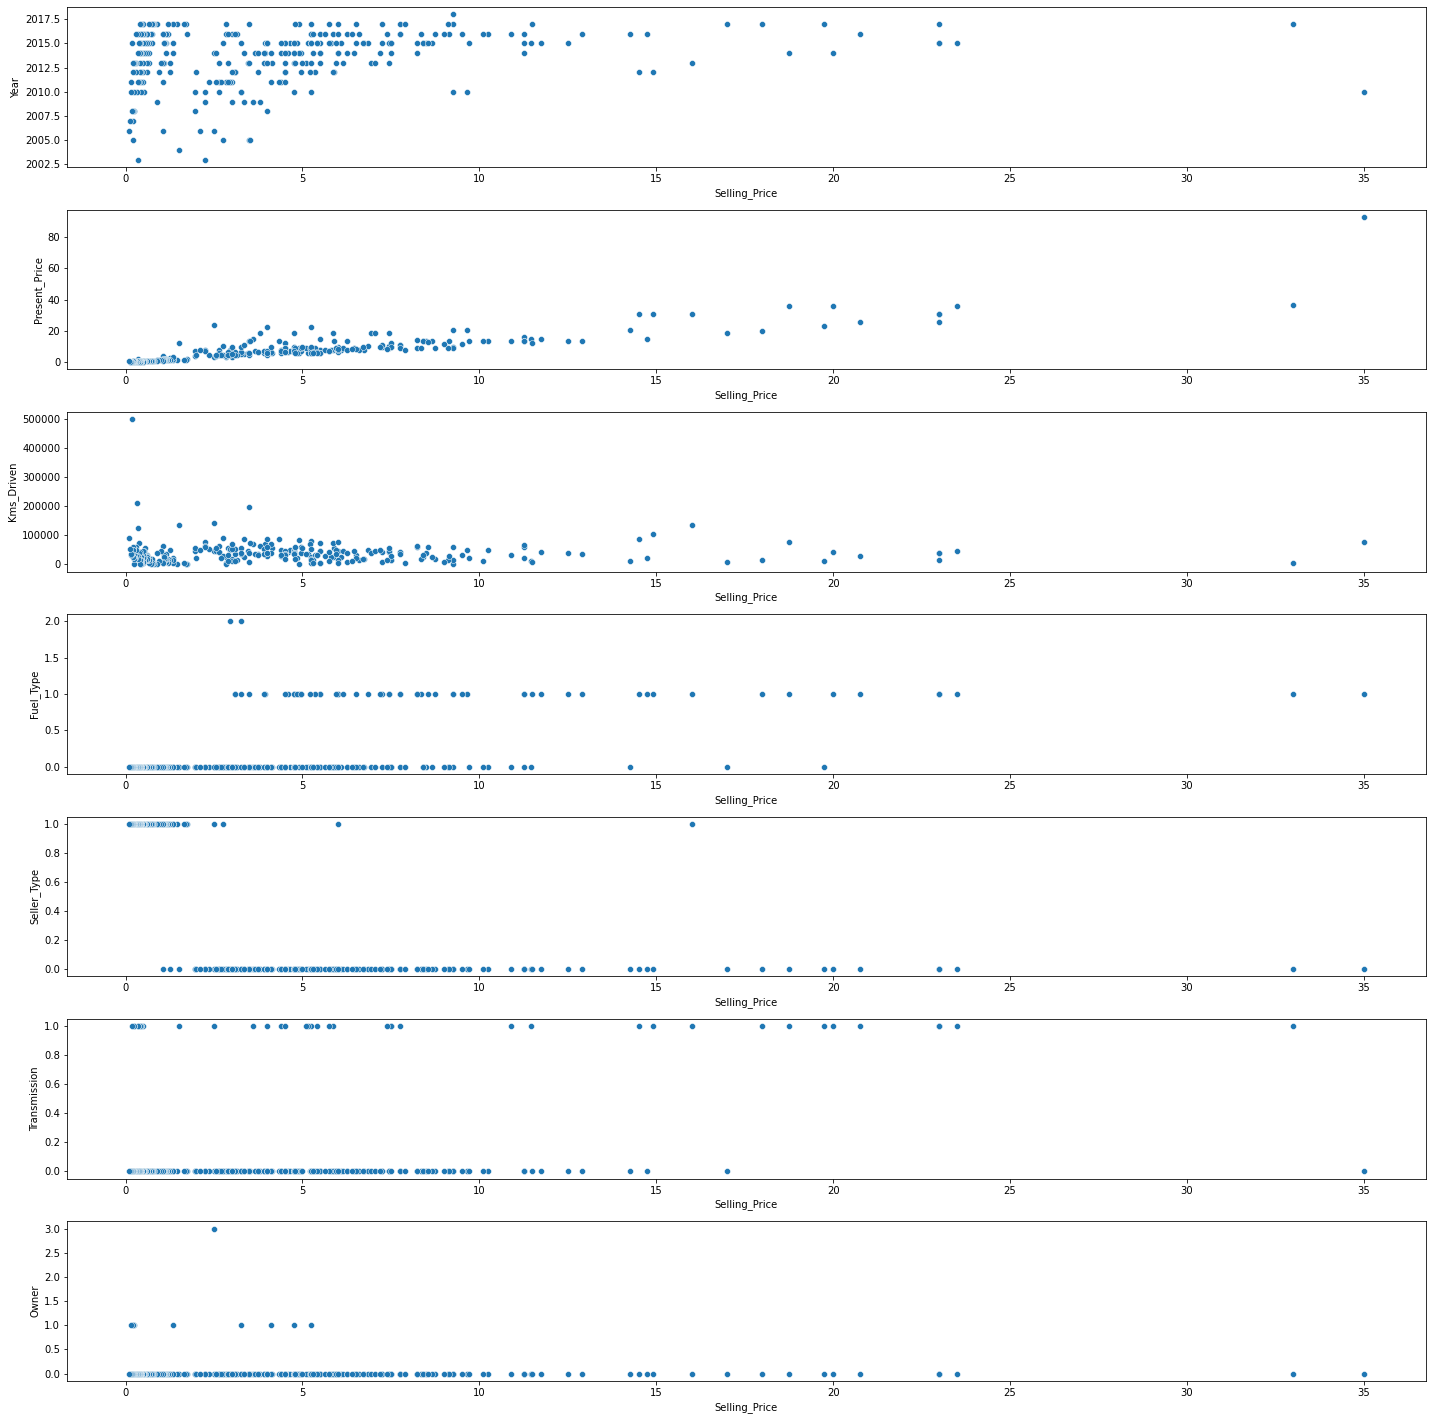

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9 :
        ax = plt.subplot(9,1,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [27]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [28]:
df1['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

## Method 1

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
sns.set()

In [30]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.128897  , -0.23621461, -0.25622446, ..., -0.73728539,
        -0.39148015, -0.17450057],
       [-0.21751369,  0.22150462,  0.1559105 , ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 1.16812909,  0.25742689, -0.77396901, ..., -0.73728539,
        -0.39148015, -0.17450057],
       ...,
       [-1.60315648,  0.39068691,  1.31334003, ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 1.16812909,  0.56450434, -0.7198763 , ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 0.8217184 , -0.20029235, -0.81095812, ..., -0.73728539,
        -0.39148015, -0.17450057]])

In [31]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [32]:
vif['Features'] = x.columns

In [33]:
vif

,VIF,Features
0,1.472927,Year
1,1.781512,Present_Price
2,1.512018,Kms_Driven
3,1.323089,Fuel_Type
4,1.448965,Seller_Type
5,1.195915,Transmission
6,1.056710,Owner


In [34]:
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,test_size = 0.2,random_state=1)

In [35]:
regression = LinearRegression()

In [36]:
regression.fit(x_train,y_train)

LinearRegression()

In [37]:
regression.score(x_train,y_train)

0.8800594535535693

In [38]:
regression.score(x_test,y_test)

0.8484549412090361

## Method-2

In [39]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [40]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()


## ALgorithms - 1

LinearRegression() 

r_2 score : 0.8484549412090361 

CV scores: [0.89746723 0.88756505 0.83007487 0.81438137 0.75880539] 

CV scores mean: 0.8376587811919396


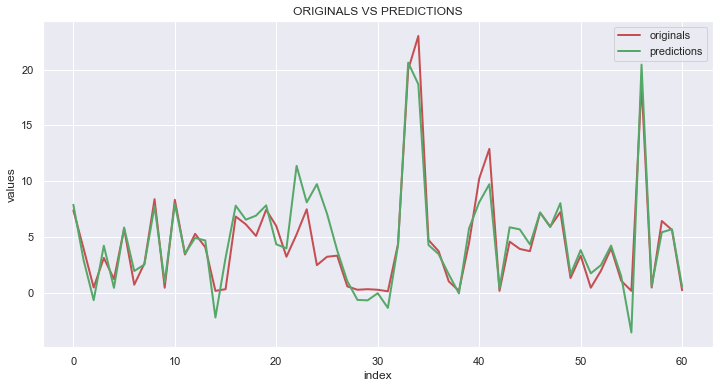

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

## ALgorithms - 2

RandomForestRegressor() 

r_2 score : 0.8963783100114033 

CV scores: [0.93060838 0.9594978  0.87231049 0.93969122 0.74093421] 

CV scores mean: 0.8886084198529289


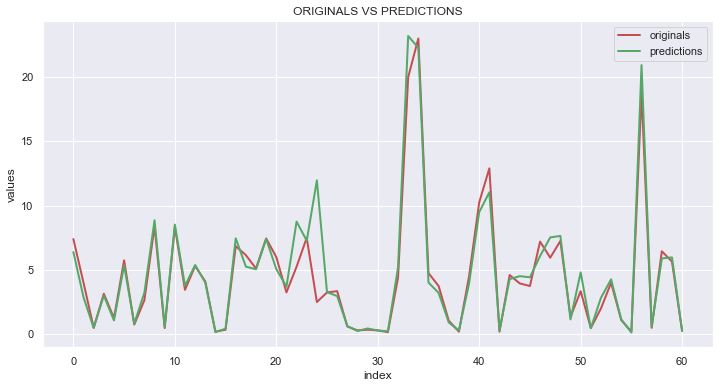

In [42]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor()
model(lr,x_train,y_train,x_test,y_test)

## ALgorithms - 3

DecisionTreeRegressor() 

r_2 score : 0.9576987137137141 

CV scores: [0.91714697 0.8445191  0.81130273 0.89965261 0.74569396] 

CV scores mean: 0.843663072676336


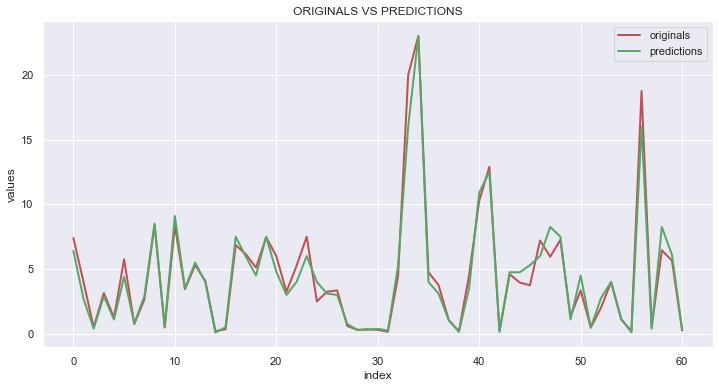

In [43]:
from sklearn.tree import DecisionTreeRegressor
lr = DecisionTreeRegressor()
model(lr,x_train,y_train,x_test,y_test)

## ALgorithms - 4

SVR() 

r_2 score : 0.7638159779304795 

CV scores: [0.83802771 0.53079551 0.69232803 0.83876289 0.23038236] 

CV scores mean: 0.6260592979593015


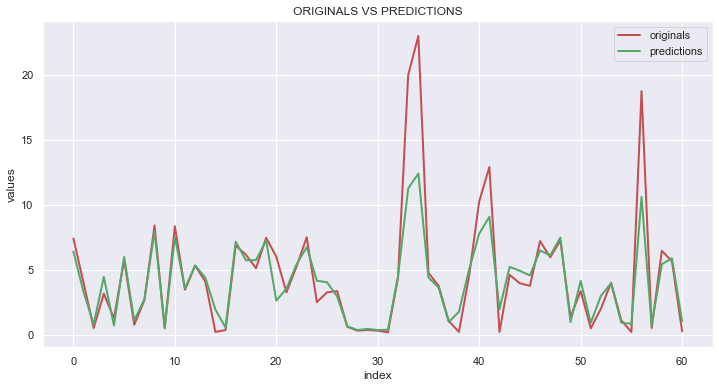

In [44]:
from sklearn.svm import SVR
lr = SVR()
model(lr,x_train,y_train,x_test,y_test)

## ALgorithms - 5

KNeighborsRegressor() 

r_2 score : 0.9365165262667094 

CV scores: [0.87961547 0.84635636 0.91706313 0.83619618 0.76146237] 

CV scores mean: 0.8481387024240385


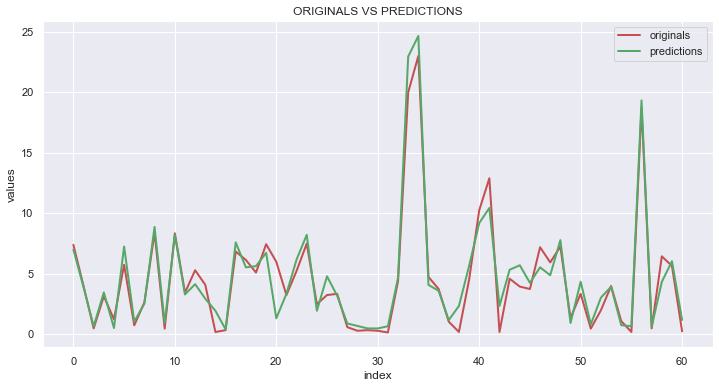

In [45]:
from sklearn.neighbors import KNeighborsRegressor
lr = KNeighborsRegressor()
model(lr,x_train,y_train,x_test,y_test)